# COGS 118A - Final Project

# Amazon Clothing Recommender
## Group members

- Irisa Jin
- Mizuho Fukuda
- Varsha Sampath
- Maya Que

# Abstract

This project focuses on building a apparel specific recommender system based on Amazon reviews. In other words, our goal is to make predictions of clothing categories and recommend it to the customer based on customers' shopping experience with Amazon. We will collect our dataset from Amazon reviews to represent the customers’ shopping experience and preferences for clothing items. Due to the multitude of apparel departments on Amazon, we intend to focus on predicting the top six most reviewed clothing classes. This project will conduct natural language processing using the NLTK library on this dataset to analyze the contents of the reviews and extract the customers’ sentiments about the product. Furthermore, it will use multi-class classification and the One vs. Rest approach with logistic regression, Naive Bayes, Support Vector Classifier, and Random Forest to classify and predict specific categories of women apparel based on various features observed in the reviews dataset. The performance of our model will be evaluated through accuracy scores, confusion matrices, as well as ROC AUC scores. These metrics will give us an overall picture of our classification success and can be used to further modify the model if needed. 

# Background

In a society where online shopping and ecommerce have become a new norm, especially after a global pandemic, creating the best experience for online shoppers has become increasingly important. According to an article by Forbes <a name="doty"><a>[<sup>[1]<sup>](#dotynote), consumers heavily prefer personalized advertisements that are tailored to their interests, and that “90% of consumers say that messages from companies that are not personally relevant to them are ‘annoying.’” This demonstrates not only the usefulness of personalized marketing but also the importance of accurate recommendation systems that do not erroneously recommend irrelevant products to consumers. It also makes ads more engaging and more likely to be interacted with, creating an overall improved experience for consumers. Many big tech companies make enormous profits by gathering and selling data based on users’ interests and shopping habits. By improving and effectively integrating a recommendation system into the online shopping process, Amazon has “reported a 29% sales increase to $12.83 billion during its second fiscal quarter,” illustrating how the improved shopping experience for customers directly translates to improved profits for an online seller. What kind of data are these online businesses and marketers using and how are they using it to create the most profitable targeted advertisements and recommendations to their shoppers?

Given the obvious advantages of generating effective product recommendations, the importance of answering this question is clear, and much research has gone into the most successful and common ways to do this. According to this literature review of studies of recommendation systems <a name="portugal"><a>[<sup>[2]<sup>](#portugalnote), a few of the most common machine learning algorithms studied to accomplish this task are clustering, decision trees, and regression. Additionally, the study details the importance of how a larger data set can improve the success of the system’s recommendations. These findings motivate how we identified the problem, as well as our proposed dataset and recommendation algorithm.

E-commerce companies like Amazon use recommender systems to identify similar products that the user just bought or viewed to maximize the impulse buying phenomenon that occurs in their physical counterparts. The personalization of shopping online keeps customers engaged and offers products of interest to them that they may not even think about. There are three main types of recommendation systems: Collaborative filtering, Content-Based filtering, and Hybrid Recommendation systems<a name="maruti"><a>[<sup>[3]<sup>](#marutinote). Collaborative filtering uses past user behavior to make recommendations while content-based filtering focuses on the attributes of the product content itself to make recommendations. Hybrid recommendation systems is a combination of using both types of filtering simultaneously to suggest a broader range of products for customers<a name="maruti"><a>[<sup>[3]<sup>](#marutinote). As these recommendation systems not only help enhance user experience, but also increase sales, efficiency, and cost savings, it is important to build understanding about how recommender algorithms work to cluster products together and suggest them to a user based on their metadata to make further improvements at integration accurate recommendations into every step of the purchasing process. 

# Problem Statement 

While E-commerce has made shopping more accessible over the past decades, people have also noticed that many issues are arising with the limitation of the in-person experience. This is especially notable when shopping for apparel. Shopping on online platforms such as Amazon for women’s clothing has always been a widely-studied topic because it is difficult to make recommendations with many different categories of clothing and range of users. Therefore, for this project, our team has decided to look into this problem by developing a machine learning model to make clothing category predictions for users on Amazon. To do this, we will analyze users' reviews to determine which product catagory they like most and should be recommended to them. We will be implementing a logistic regression algorithm that predicts classes based on the One vs. Rest approach; in other words, 1 will be predicted if the category that the machine learning algorithm predicts matches one specific category that we choose and 0 if not (any other class). This will be computed for the different classes we choose to look at. For this algorithm, we will measure its overall performance by building a confusion matrix on the results from using the testing dataset. The confusion matrix will allow us to calculate various metrics that will be useful for assessing the model (see more on Evaluation Metrics). Besides having the steps be clearly listed, we will be making sure that the results can be replicated by performing cross-validation on the dataset. Furthermore, we will also experiment with various other machine learning models such as Naive Bayes, SVM, and Random Forest to see which one has the highest accuracy for our predictions. The resulting model can not only be used to analyze features in customers' reviews, but also serve as recommendations of clothings for individuals to discover products that match their preferences and further their shopping experience.

# Data

For this project, we found a dataset with Amazon reviews on women’s dresses. Here is some general information regarding the dataset:

- 11 variables, 23.5 thousand observations
- Each observation consists of the index (unique), age of the customer, division of the cloth the customer bought, department of the cloth, classification of the cloth, clothing ID (unique), title of the review text, the content of the review text, number of other customers who agree with the review, ratings in stars given to the product, and a binary recommendation index with 1 for yes and 0 for no.
- Source: https://www.kaggle.com/datasets/surajjha101/myntra-reviews-on-women-dresses-comprehensive

Notice that the final size of the dataset that will be used is different since there are missing values and points that we manually omit for the purpose of the project. The critical variables that we will focus on is the age, class of clothing, review text, number of customers who agree with the given feedback, and the rating. The rest of the variables, including the division of clothing, department of clothing, clothing id, and title of review, will not be used in our mdel since they are quite similar to other features and are redundant. Furthermore, our project intends to recommend similar clothing to customers who had a positive experience, so we are only concerned with reviews that have a recommend index of 1. 

We intend to numerically encoded text-form data to transform the data into an analyzable form. To do this, we will use the NLTK package to manipulate the text data, count the most frequently used words, clean out English stopwords, and stemm words with NLTK to avoid repetition of the same meaning of words.

In [1]:
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords # if it can't load, run: pip install nltk -> nltk.download('stopwords')
from collections import defaultdict

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/mque/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

**Raw Data**

In [3]:
data = pd.read_csv('dresses.csv')
data.head()

,s.no,age,division_name,department_name,class_name,clothing_id,title,review_text,alike_feedback_count,rating,recommend_index
0,0,40,General,Bottoms,Jeans,1028,Amazing fit and wash,Like other reviewers i was hesitant to spend t...,0,5,1
1,1,62,General Petite,Tops,Blouses,850,Lovely and unique!,As is true of a bunch of the fall clothing pho...,12,5,1
2,2,47,General Petite,Bottoms,Skirts,993,Meh,"I so wanted this skirt to work, love the desig...",3,1,0
3,3,45,General Petite,Bottoms,Pants,1068,Wow,Love love this! i was hesitant to buy this at ...,0,5,1
4,4,37,Initmates,Intimate,Swim,24,Great for bigger busts,I absolutely love the retro look of this swims...,0,5,1


In [4]:
data.shape

(23486, 11)

We first use a heatmap to get a basic understanding of the relationships across mutliple variables. We see that the correlation between rating and recommend_index is 0.79, which indicates a fairly strong positive relationship. This suggests that customers who are satisified with the item and give a positive rating are likely to recommend the products to others. For our purposes, however, we will only be looking at reviews with a recommendation index of 1 since we only want to analyze positive reviews. We also observe there is no strong correlation between the rest of the variables but because this is unnormalized raw data, we expect the relationship between the features to be different once the data is transformed.

<AxesSubplot:>

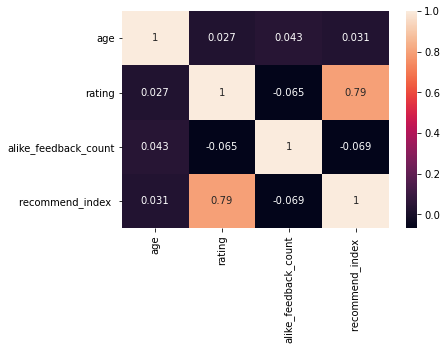

In [5]:
corr = data[['age','rating','alike_feedback_count', 'recommend_index ']]
sns.heatmap(corr.corr(), annot=True)

**Data Cleaning**

The columns: s.no, division_name, department_name, and title will not be used in our analysis because they are either irrelevant information or they overlap with other features.

In [6]:
# Dropping redundant columns
df = data.drop(columns=['s.no','division_name','department_name','title', 'clothing_id'])
df.head()

,age,class_name,review_text,alike_feedback_count,rating,recommend_index
0,40,Jeans,Like other reviewers i was hesitant to spend t...,0,5,1
1,62,Blouses,As is true of a bunch of the fall clothing pho...,12,5,1
2,47,Skirts,"I so wanted this skirt to work, love the desig...",3,1,0
3,45,Pants,Love love this! i was hesitant to buy this at ...,0,5,1
4,37,Swim,I absolutely love the retro look of this swims...,0,5,1


We looked at if there are any values missing from the dataframe, after dropping unneeded columns. We found 14 missing values in class_name and 774 missing values in review_text. This is a small amount of data considering the large size of our dataset, therefore, dropping these points would not greatly affect our predictions.

In [7]:
# Checking if there is missing/NaN values
df.isnull().values.any() 
df.isnull().sum() 

# Dropping NaN values
df = df.dropna()
df

,age,class_name,review_text,alike_feedback_count,rating,recommend_index
0,40,Jeans,Like other reviewers i was hesitant to spend t...,0,5,1
1,62,Blouses,As is true of a bunch of the fall clothing pho...,12,5,1
2,47,Skirts,"I so wanted this skirt to work, love the desig...",3,1,0
3,45,Pants,Love love this! i was hesitant to buy this at ...,0,5,1
4,37,Swim,I absolutely love the retro look of this swims...,0,5,1
...,...,...,...,...,...,...
23481,44,Dresses,I oot this dress in the blue. it fits great--h...,0,5,1
23482,39,Dresses,I was very patient with this dress. i was wait...,1,5,1
23483,29,Knits,"The deep v doesn't gape, and flatters the neck...",0,5,1
23484,57,Dresses,"I saw this dress online this morning, went int...",10,5,1


**EDA**

Here we look at the distribution of the ages:

There seem to be a few high outliers with respect to the Age variable. It can also be observed that the Age variable is right skewed from the following bar chart, suggesting that most of the reviewers fall in the category of older adults. We will use IQR instead to handle these outliers so our distribution is more normal. 

Text(0.5, 0, 'age')

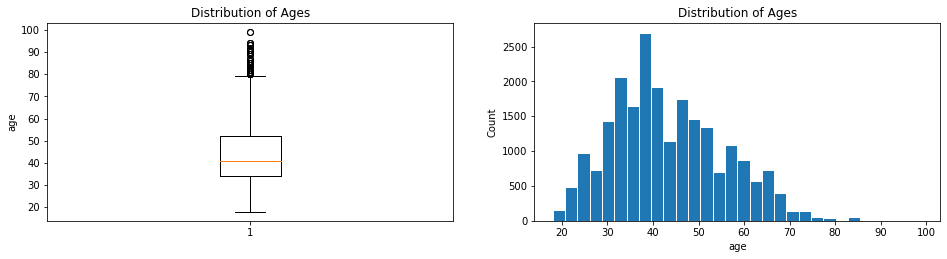

In [8]:
plt.figure(figsize=(16, 8))
plt.subplot(2,2,1)
plt.boxplot(df['age'])
plt.title('Distribution of Ages')
plt.ylabel('age')
plt.subplot(2,2,2)
plt.hist(df['age'], bins=30, ec='w');
plt.title('Distribution of Ages')
plt.ylabel('Count')
plt.xlabel('age')

In [9]:
# Function for handling outliers

def outliers(age):
    """ This function uses IQR to treat outliers. """
    age = sorted(age)
    q1 = np.percentile(age, 25)
    q3 = np.percentile(age, 75)
    
    iqr = q3-q1
    
    lower = q1 - (1.5*iqr)
    upper = q3 + (1.5*iqr)
    
    age = np.where(age < lower, lower, age)
    age = np.where(age > upper, upper, age)
    
    return age

In [10]:
df = df.copy()
df['age'] = outliers(df['age'])

Text(0.5, 0, 'age')

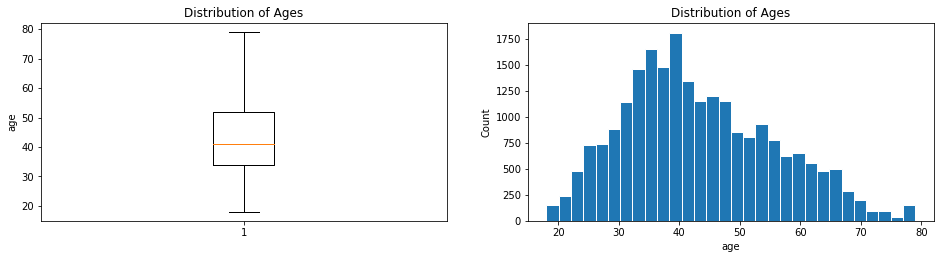

In [11]:
plt.figure(figsize=(16, 8))
plt.subplot(2,2,1)
plt.boxplot(df['age'])
plt.title('Distribution of Ages')
plt.ylabel('age')
plt.subplot(2,2,2)
plt.hist(df['age'], bins=30, ec='w');
plt.title('Distribution of Ages')
plt.ylabel('Count')
plt.xlabel('age')

After treating the outliers, one can see that the distribution of ages is less skewed and has a more normal curve. 

Furthermore, we want to look at the distibution of overall product ratings in our dataset. From the distribution below, we can see that most users give ratings of 5 whereas very few users give low ratings of 1 and 2.

Text(0.5, 0, 'Ratings of Products')

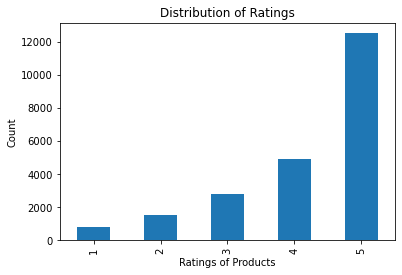

In [12]:
df['rating'].value_counts().sort_values().plot(kind='bar');
plt.title('Distribution of Ratings')
plt.ylabel('Count')
plt.xlabel('Ratings of Products')

Now we look at the distribution of the different classes of clothing:

As shown below, some classes have significantly more reviews than others. Since we will be doing multi-class classification, it would simplify our analysis and computation if we reduce the number of categories. As a result, we decided to only focus on the top 6 most popular clothing categories: Dresses, knits, blouses, pants, sweaters, and jeans. Dropping the other categories from our dataset still leaves us with 14307 data points, which is still large enough. We observe that dresses, knits, and blouses have the greatest number of reviews with dresses having the maximum amount. Meanwhile, sweaters, pants, and jeans have a smaller and more even number of reviews. 

In [13]:
df['class_name'].value_counts()

Dresses           6145
Knits             4626
Blouses           2983
Sweaters          1380
Pants             1350
Jeans             1104
Fine gauge        1059
Skirts             903
Jackets            683
Lounge             669
Swim               332
Outerwear          319
Shorts             304
Sleep              214
Legwear            158
Intimates          147
Layering           132
Trend              118
Casual bottoms       1
Chemises             1
Name: class_name, dtype: int64

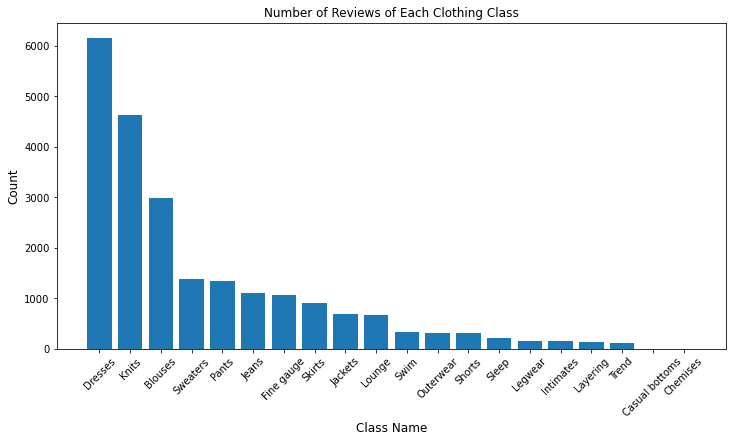

In [14]:
df_class_group = df.groupby('class_name').count().reset_index().sort_values('age', ascending=False)
plt.figure(figsize=(12, 6))
plt.bar(data=df_class_group, x='class_name', height='age')
plt.xticks(rotation=45)
plt.title('Number of Reviews of Each Clothing Class')
plt.xlabel('Class Name', fontsize='large')
plt.ylabel('Count', fontsize='large')
plt.show()

In [15]:
top_class_names = list(df['class_name'].value_counts()[:6].index)
df = df[df['class_name'].isin(top_class_names)]
df.head()

,age,class_name,review_text,alike_feedback_count,rating,recommend_index
0,18.0,Jeans,Like other reviewers i was hesitant to spend t...,0,5,1
1,18.0,Blouses,As is true of a bunch of the fall clothing pho...,12,5,1
3,18.0,Pants,Love love this! i was hesitant to buy this at ...,0,5,1
5,19.0,Sweaters,I love this sweater but i'm on the fence about...,0,4,1
6,19.0,Sweaters,Love this sweater!\r\nsoft and cozy and the ru...,4,5,1


# Proposed Solution

We will perform multi-class classification with logistic regression to classify categories of women’s clothing based on various features of the review dataset. Since there are multiple categories of clothing and we wish to predict specific categories based on features in customer reviews, it is appropriate to classify reviews into multiple classes rather than only two sets. The One vs. Rest approach will be utilized to perform multi-class classification. We chose One vs. Rest rather than the One vs. One approach out of the concern that the One vs. One approach may be too computationally exhausting for our purposes due to the large number of categories we plan to classify. The number of classifiers required for the One vs. Rest approach is k (equal to the number of categories) whereas the One vs. One approach requires k(k-1)/2 classifiers to classify k categories. Since we expect to categorize the 23.5k reviews (likely less after we drop some of the less popular categories) into at least 6 different categories, it is more appropriate to use a One vs. Rest approach. As such, we chose logistic regression as our baseline model for the method of classification since logistic regression allows us to quantify confidence scores for the classification, which is used as a tiebreaker in the One vs. Rest approach of multi-class classification. We will also be including Naive Bayes, LinearSVC, and RandomForest in our model selections as they are also suitable for multiclassification tasks and can be trained on large, high-dimensional feature spaces. These algorithms will be implemented using mostly the sklearn libraries to process and construct the models. In addition to the machine learning algorithms, we will be using various libraries and algorithms to prepare the data for classification. Specifically, we will be using the NLTK library to analyze the customer reviews. Since the reviews are bodies of text, NLTK provides useful tools for analyzing the contents of these reviews. Methods like nltk.corpus.stopwords.words("english") and nltk.word_tokenize()allows us to transform our data into a form that is easier to work with while providing useful information about our dataset. NLTK also provides a built-in sentiment analyzer VADER, which is a very useful tool for analyzing the sentiments of the customer reviews. Efficiently and accurately dissecting the contents of the reviews is important for accurate classification. 

For performance evaluation, we will train models using a train/test split on our data and use metrics such as accuracy, precision, recall and f1 scores to evaluate the performance of the classifer on the testing set. Furthermore, we will also use cross validation to not only minimize overfitting and improve generalizability, but also to use grid search for tuning in order to find the optimal hyperparameters for the model. We plan to use a logistic regression classifier as our benchmark model and compare it with the performances of other models (Naive Bayes, LinearSVC, RandomForest). 

# Evaluation Metrics

We plan to use several metrics to evaluate the performance of our algorithm. We will predict the clothing class from the user reviews, so the confusion matrix will be a useful tool for us to easily visualize and understand the performance of classification. It is a convenient metric since it can be used not only for binary classification but also for multi-class classification. We will be able to generate an easily interpretable k x k grid, displaying true and false predictions. The confusion matrix would show the True Positive (TP), False Positive (FP), True Negative (TN), and False Negative (FN) values. False positive cases may occur when the classifer incorrectly predicts a positive result, and false negative cases occur when the classifer incorrectly predicts a negative result. On the other hand, true positive outcomes occur when a model correctly predicts a positive result, and true negative outcomes occur when the model correctly predicts a negative result. The confusion matrix can tell us information about the accuracy of our model, showing how often it is correct, which is calculated as (TP + TN) / total. It can also tell us about the precision, which shows how often our yes predictions are correct, calculated as TP / yes predictions. Additionally, we can find out about how about our error or misclassification rate by calculating (FP + FN) / total. Since we would like recommend the most relevant clothing class to the user based on their review, we will focus on getting higher f1 scores, which serves as a measure of the model's accuracy by combining precision and recall scores, as well as higher accuracy scores. 

Furthermore, we will generate accuracy and ROC AUC scores in order to get a better idea of the trends in the performance of the classification that can help us better improve model performance. The ROC curve is calculated using the True Positive Rate, or sensitivity, against the False Positive Rate, or 1 - sensitivity. The True Positive Rate is equal to TP / (TP + FN), and the False Positive Rate is equal to FP / (FP + TN). These values are plotted against each other to find the ROC curve, from which we can calculate the AUC, or area under the ROC curve. The ROC Curve allows to learn how much the model is capable at distinguishing between classes, or in other words, if it has a good measure of separability. We want the AUC to be as close to 1.0 as possible to demonstrate an accurate model that can distinguish between predicting 0 classes as 0 and 1 classes as 1. 

The formulas for the aforementioned metrics are shown below. 

$\text{Accuracy}=\frac{TP+TN}{\text{TP+FP+FN+TN}}$

$\text{Precision}=\frac{TP}{TP+FP}$

$\text{Recall}=\frac{TP}{TP+Fn}$

$\text{F1-score}=\frac{2*Precision*Recall}{Precision + Recall}$

$FPR=\frac{FP}{FP+TN}$

$TPR=\frac{TP}{TP+FN}$

# Results

We will be analyzing customers' reviews to make clothing category predictions that customers' will like and can be recommended to them.

### 1. Preparing the Dataset for Analysis

We transform the review text data into numerical values in the next few steps:


Since we are focusing on what product reviewers like so we can recommend similar products to similar reviewers, we only want to look at reviews with a recommendation index of 1.

In [16]:
df1 = df.copy()
df1 = df1[df1['recommend_index '] != 0]
df1 = df1.drop(columns=['recommend_index '])

We then clean the review text to obtain the words with the highest number of occurences in the dataset.

In [17]:
#using the stopwords from the nltk package
stopwords_list = stopwords.words('english')

#Find the words with the highest number of occurrences in the dataset
top_words = pd.Series(' '.join(df1['review_text']).lower().split()).value_counts()[:200]

#Drop punctuations
for idx in top_words.index:
    for i in list(idx):
        if i in set(string.punctuation):
            top_words = top_words.drop(idx)
            
#Drop stopwords
for idx in top_words.index:
    if idx in stopwords_list:
        top_words = top_words.drop(idx)

After getting the top frequently occuring words in the dataset, we encode the review text based on the occurences of the top words. 

In [18]:
def word_count(text):
    """
    Takes in a body of text and returns a dictionary of word counts.
    """
    counts = defaultdict(int)
    r = ''.join([c for c in text.lower() if not c in set(string.punctuation)])
    
    for w in r.split():
        if w not in stopwords_list:
            counts[w] += 1
    
    return counts

def encode_review(review):
    """
    Takes in a body of text and returns an encoded text based on the occurrece of top words.
    """
    res = np.zeros(len(top_words))
    top = list(top_words.index)
    word_counts = word_count(review)
    i = 0
    for key,value in word_counts.items():
        if key in top:
            res[top.index(key)]=value
        i += 1
        
    return np.array(list(map(int, res)))

In [19]:
# Get a series of 100 most frequently occuring words
top_words = top_words[:100]

# Transform the dataframe by encoding the review_text
df1['review_text'] = df1['review_text'].apply(encode_review)
df1.head()

,age,class_name,review_text,alike_feedback_count,rating
0,18.0,Jeans,"[0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",0,5
1,18.0,Blouses,"[0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...",12,5
3,18.0,Pants,"[0, 2, 2, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, ...",0,5
5,19.0,Sweaters,"[0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, ...",0,4
6,19.0,Sweaters,"[0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, ...",4,5


The data is reformatted and normalized to address class imbalance issues, and then split into training, validation, and testing set.

In [20]:
# Split X and y and turn Dataframe into numpy arrays
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X_pre = df1.drop(columns=['class_name']).to_numpy()
y = np.ravel(df1[['class_name']].to_numpy())

# Format design matrix
X = np.zeros((X_pre.shape[0], 103))
for i in range(X_pre.shape[0]):
    X[i] = np.hstack(tuple(X_pre[i]))

# Normalize the data
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)
X

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

### 2. Baseline Model and Models Selection

For our baseline model, we chose a multi-class logistic regression model using the One vs. Rest strategy, liblinear solver, and an L2 penalty term. After implementing the model, we obtain an accuracy score of 0.65.

#### Logistic Regression (Baseline Model)

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

clf = LogisticRegression(multi_class='ovr', solver='liblinear', penalty='l2')
clf.fit(X_train, y_train)
print(f'Accuracy score of baseline model: {clf.score(X_val, y_val)}')

y_pred = clf.predict(X_test)

Accuracy score of baseline model: 0.6582809224318659


To aim for higher efficency and accuracy, we also decided to experiment with other algorithms, namely Naive Bayes, Suppport Vector Machines, and Random Forest. We first calculate the accuracy of each model over the train/test data split.

**Multinomial Naive Bayes**
- Naive Bayes computes the conditional probabilties of each tag for the given text and outputs the tag with the highest probability. Any vector representing a text will contain information about probabilities of a certain word appearing within texts of a given category. This algorithm helps compute the probability of the text belonging to that category; however, it assumes independence between the features, which may result in a loss of accuracy. Despite that, Naive Bayes can handle a large amount of input features and is has computational efficiency. 

**Support Vector Machines**
- Support Vector Machines is effective in high dimensional spaces. SVM finds hyperplanes to create the best deicison boundary that can segregate n-dimensional space into classes so datapoints can be classified correctly. We will be using the Linear Support Vector classification for our project. 

**Random Forest**
- Random Forest is an ensemble method that combines the output of multiple decision trees and uses majority vote on predictions to improve accuracy and control overfitting. It is suitable for dealing with high dimensional noisy data and can identify meaningful features for text classification. 

#### Naive Bayes

In [22]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB().fit(X_train, y_train)
print(f'Accuracy score of Multinomial Naive Bayes model: {nb.score(X_val, y_val)}')

Accuracy score of Multinomial Naive Bayes model: 0.5429769392033543


#### Linear SVC

In [23]:
from sklearn import svm
from sklearn.svm import LinearSVC

svm = LinearSVC().fit(X_train, y_train)
print(f'Accuracy score of SVM: {svm.score(X_val, y_val)}')

Accuracy score of SVM: 0.6568832983927324


#### Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier().fit(X_train, y_train)
print(f'Accuracy score of Random Forest: {clf.score(X_val, y_val)}')

Accuracy score of Random Forest: 0.6582809224318659


### 3. Cross Validation to Compare Algorithms

We use cross validation to loop through the list of models over multiple folds and get a mean accuracy for each model. By training and testing model over multiple folds of the dataset, the cross validation method gives us a better understanding as well as a robust estimate of model performance's over the whole dataset instead of just a single train/test split.

In [25]:
from sklearn.model_selection import cross_val_score

models = [
    LogisticRegression(multi_class='ovr', random_state=42),
    MultinomialNB(),
    LinearSVC(),
    RandomForestClassifier(random_state=42)
]


CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, X, y, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

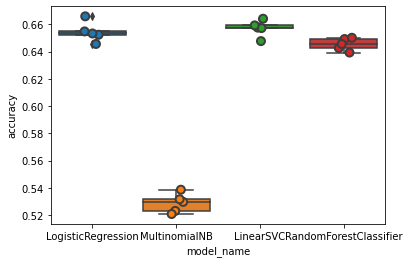

In [26]:
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [27]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.657161
LogisticRegression        0.654365
MultinomialNB             0.528762
RandomForestClassifier    0.645348
Name: accuracy, dtype: float64

We observe that Multinomial Naive Bayes and Random Forest have lower accuracy scores of around 0.52 and 0.64 respectively, while Logistic Regression and LinearSVC have higher accuracy scores around 0.65. We see that while both Logistic Regression and LinearSVC perform better than the other two classifiers, LinearSVC has a slightly higher median accuracy than Logistic Regression and performs just a bit better. 

In the next steps, we will continue exploring hyperparameters that optimize our model predictions.

### 4. Learning Curve

Next, we calculate and plot a learning curve to see the ideal training set size using our baseline model:

In [28]:
train_size_abs, train_scores, test_scores = learning_curve(estimator=clf, X=X, y=y)
train_scores = np.array(list(map(np.mean, train_scores)))
test_scores = np.array(list(map(np.mean, test_scores)))
train_scores, test_scores

(array([0.69982517, 0.68824953, 0.67727995, 0.67198106, 0.66961992]),
 array([0.58824328, 0.63856776, 0.64639653, 0.65303683, 0.65464468]))

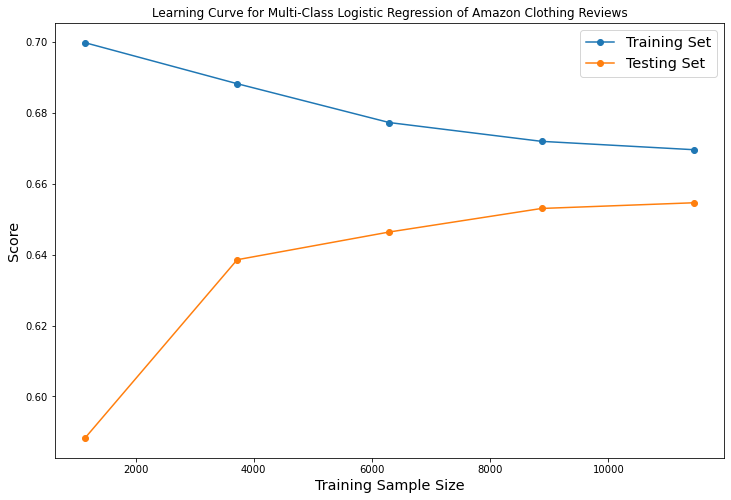

In [29]:
plt.figure(figsize=(12,8))
plt.plot(train_size_abs, train_scores, 'o-')
plt.plot(train_size_abs, test_scores, 'o-')
plt.legend(['Training Set', 'Testing Set'], fontsize='x-large')
plt.title('Learning Curve for Multi-Class Logistic Regression of Amazon Clothing Reviews')
plt.xlabel('Training Sample Size', fontsize='x-large')
plt.ylabel('Score', fontsize='x-large')
plt.show()

Based on the learning curve, a very large training sample size around 8000 to 10000 is preferable as the gap between accuracy scores of the training and testing sets is the smallest in this interval. Our current train-val-test split satisfies this interval so we will not change our training size.

### 5. Hyperparameter Tuning

In this section, we will perform 7-fold cross validation gridsearch to determine the best set of parameters for our models. Due to the large size of our dataset, we will focus on tuning a shortened list of hyperparameters. We will evalulate our scores on f1 score due to the uneven class distribution in our dataset.  

#### Logistic Regression

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, precision_recall_fscore_support, confusion_matrix, plot_confusion_matrix, classification_report, ConfusionMatrixDisplay

In [31]:
param_grid = {'C': [0.01, 0.5, 10], 'penalty' : ['l1', 'l2'], 'solver': ['liblinear']}

gscv = GridSearchCV(estimator=LogisticRegression(), param_grid = param_grid, cv=7, scoring='f1_micro', n_jobs=-1)
gscv.fit(X_train, y_train)

print(f'Best parameters for Logistic Regression: {gscv.best_params_}')

Best parameters for Logistic Regression: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}


In [32]:
y_pred = gscv.best_estimator_.predict(X_test)
y_pred_probs = gscv.predict_proba(X_test)
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))
print('Area under the Receiver Operating Characteristic curve:', 
      roc_auc_score(y_test, y_pred_probs, multi_class="ovr", average="weighted"))

Accuracy: 0.65
Precision: 0.66
Recall: 0.65
F1-score: 0.64
Area under the Receiver Operating Characteristic curve: 0.9002498906241643


The accuracy score for our logistic regression classifier stays roughly the same at around 0.65. The ROC AUC score is 0.90, which is fairly close to 1 and indicates that our classifer is successful at distingushing between positive and negative classes to a pretty high degree. In other words, our classifer is able to detect more numbers of true positives and true negatives than false positives and false negatives.

#### Naive Bayes

In [33]:
mnb_parameters = {'alpha': np.linspace(0.5, 1.5, 6), 
                  'fit_prior': [True, False]}

mnb_gs = GridSearchCV(estimator=MultinomialNB(), param_grid=mnb_parameters, cv=7, scoring='f1_micro', n_jobs=-1)
mnb_gs.fit(X_train, y_train)

print(f'Best parameters for Multinomial Naive Bayes: {mnb_gs.best_params_}')

Best parameters for Multinomial Naive Bayes: {'alpha': 0.5, 'fit_prior': False}


In [34]:
y_pred_mnb = mnb_gs.best_estimator_.predict(X_test)
y_pred_probs_mnb = mnb_gs.predict_proba(X_test)
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred_mnb)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred_mnb, average='weighted')))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred_mnb, average='weighted')))
print('F1-score: {:.2f}'.format(f1_score(y_test, y_pred_mnb, average='weighted')))
print('Area under the Receiver Operating Characteristic curve:', 
      roc_auc_score(y_test, y_pred_probs_mnb, multi_class="ovr", average="weighted"))

Accuracy: 0.61
Precision: 0.63
Recall: 0.61
F1-score: 0.61
Area under the Receiver Operating Characteristic curve: 0.8731853967881319


#### Linear SVC

In [35]:
import warnings
warnings.filterwarnings('ignore')

parameters = {'C':[0.1, 10, 100]}

lsvm_gs = GridSearchCV(estimator=LinearSVC(max_iter=100000), param_grid = parameters, cv=7, scoring='f1_micro', n_jobs=-1)
lsvm_gs.fit(X_train, y_train)

print(f'Best parameters for Linear SVC: {lsvm_gs.best_params_}')

Best parameters for Linear SVC: {'C': 10}


In [36]:
y_pred_lsvm = lsvm_gs.best_estimator_.predict(X_test)
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred_lsvm)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred_lsvm, average='weighted')))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred_lsvm, average='weighted')))
print('F1-score: {:.2f}'.format(f1_score(y_test, y_pred_lsvm, average='weighted')))

# since LinearSVC has no attribute 'predict_proba', we did not find the
# ROC AUC score for this model

Accuracy: 0.65
Precision: 0.66
Recall: 0.65
F1-score: 0.64


#### Random Forest

In [37]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_depth': [10, 20, 30, 40],
}


rand_gs = GridSearchCV(RandomForestClassifier(), 
                                 param_grid = param_grid,  
                                 cv=7, scoring='f1_micro', n_jobs=-1)

rand_gs.fit(X_train, y_train)

best_rf = rand_gs.best_estimator_
print('Best parameters for Random Forest:',  rand_gs.best_params_)

Best parameters for Random Forest: {'max_depth': 30, 'n_estimators': 150}


In [38]:
y_pred_rf = best_rf.predict(X_test)
y_pred_probs_rf = rand_gs.predict_proba(X_test)
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred_rf)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred_rf, average='weighted')))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred_rf, average='weighted')))
print('F1-score: {:.2f}'.format(f1_score(y_test, y_pred_rf, average='weighted')))
print('Area under the Receiver Operating Characteristic curve:', 
      roc_auc_score(y_test, y_pred_probs_rf, multi_class="ovr", average="weighted"))

Accuracy: 0.65
Precision: 0.68
Recall: 0.65
F1-score: 0.64
Area under the Receiver Operating Characteristic curve: 0.8953690905008924


After tuning the hyperparameters, we displayed the test scores for each of our models. We observe that Naive Bayes has the lowest accuracy and f1 scores of around 0.61, as well as ROC AUC scores of around 0.87. We also see that Logistic Regression, LinearSVC, and Random Forest have the same accuracy and f1 scores at around 0.65 and 0.64, with Random Forest also having higher precision scores at around 0.68. Contrary to what we found earlier where LinearSVC appeared to be the best model, we see in this section that Random Forest has become a more optimal model in this context with the higher accuracy scores and f1 scores than before, as well as the second highest ROC AUC score of 0.89. However, due to time constraints, we were unable to conduct further extensive hyperparameter tuning on the models, which may be preventing our alogorithms from serving the best predictions possible. 

### 6. Evaluation Using Confusion Matrix

Below, we use a confusion matrix and several metrics to evaluate the performace of a model selected in the above cross validation process. Although our Logistic Regression, LinearSVC, and Random Forest models had around the same accuracy and performance, we decided to use our original baseline Logistic Regression model for evalulation since the other two can be more computationally extensive when working with large datasets with many variables. There are 6 different classes being predicted, so we are using multi-class metrics. We decided to generate a confusion matrix to show the distribution of true positives, true negatives, false positives, and false negatives, as well as calculate the accuracy and f1 scores for each class to get a better idea of how our models makes correct and incorrect predictions.

#### Logistic Regression

In [39]:
y_pred = gscv.best_estimator_.predict(X_test)
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted', zero_division=1)))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))
print('\nClassification Report:\n')
print(classification_report(y_test, y_pred, zero_division=1))

Accuracy: 0.65
Precision: 0.66
Recall: 0.65
F1-score: 0.64

Classification Report:

              precision    recall  f1-score   support

     Blouses       0.43      0.27      0.33       235
     Dresses       0.88      0.87      0.88       496
       Jeans       0.67      0.63      0.65       101
       Knits       0.47      0.70      0.56       369
       Pants       0.64      0.38      0.48       124
    Sweaters       0.83      0.58      0.69       106

    accuracy                           0.65      1431
   macro avg       0.65      0.57      0.60      1431
weighted avg       0.66      0.65      0.64      1431



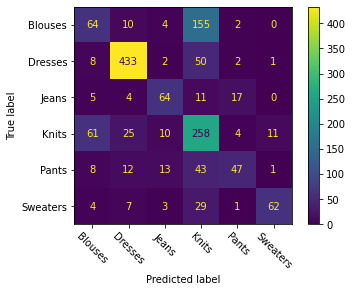

In [40]:
plot_confusion_matrix(gscv.best_estimator_, X_test, y_test)
plt.xticks(rotation = -45);

Our overall accuracy score is 0.65. What can be causing the errors? 

The confusion matrix gives us an idea of which specific classes our model is better or worse at predicting. The dresses category has the highest f1-score of 0.88, indicating a high recall and precision, thus an overall high accuracy. This seems reasonable since dresses is the largest class of the 6 and does not belong to the same department as any of the other classes. The sweaters class has the second highest f1-score of 0.69 and notice that it has a fairly high precision of 0.83 (true positives out of all the predicted positives) but a fairly low recall of 0.58 (predicted true positives predicted out of all positives). This indicates that our model has a high number of false negatives in the sweater class in which it incorrectly predicts its positive case. To understand this behavior, we need to look at the classes.

Observing the confusion matrix, we notice that dresses and knits have the higher true postive values, suggesting that our model accurately predicts values for these classes. On the other hand, blouses, sweaters, jeans, and knits do not have very high true positive values, indicating that our model is not as accurate with predicting for these classes. This may be because our dataset has the highest value counts for dresses and knits compared to the other classes, so our model may be better at prediction for them. Furthermore, it seems that blouses, knits, and sweaters tend to be confused by our model. This is not surprising intuitively because knits and sweaters are practically the same categories and blouses also belongs to the category of 'tops'. Similarly, pants and jeans also tend to be confused by our model due to the fact that they belong to the same broader category of 'bottoms'.

# Discussion 

### Interpreting the result

Overall, we were successful in creating models that predict the clothing class for users based on user reviews. We can see that with the exception of the Multinomial Naive Bayes models, the rest of our models (LinearSVC, Random Forest) performs around the same or even slightly better than our baseline Logistic Regression model. Naive Bayes may have not performed as well due to its assumption that all features are independent of each other, which is not necessarily the case for the features in the customer review dataset. Since Logistic Regression and LinearSVC have similar accuracy and f1 scores, we conclude that they are both fairly good models for our classification problem. Although Random Forest also produces similar accuracy and f1 scores, it has a lot of parameters that causes it to take a long time to tune, train, and fit compared to other models and is thus, not as efficient. These results suggest that logistic regression and support vector models (SVC) may be more suitable at predicting clothing categories from product reviews in this dataset and therefore, can offer valuable tool for analyzing and classifying text. However, since our overall accuracy scores in general were not that high, we may need to use more complex algoirthms in addition to larger datasets and more variables to implment a model that accurately recommends clothing classes based off of reviews. 


### Limitations 

One main limitation for our model was that it was difficult to precisely separate categories of clothing that belong to the same department. For example, our confusion matrix indicated that our model tended to confuse sweaters, knits, and blouses together because they all belong to the "tops" department; similarly, pants and jeans were confused as they are both "bottoms". We believe this is the main cause of the problem with our model since it performed relatively well on the dresses class, which does not belong to either "tops" or "bottoms". In other words, the dresses class was easily separable from other classes while different categories of tops and bottoms were less separable with the given features. Our model is good enough for predicting the general department but not accurate enough to classify the reviews into specific subcategories.

Furthermore, another limitation was that our dataset was imbalanced. We did not have an even number of reviews in each clothing class; instead, most of the reviews were in the dresses, knits, and blouses category, while a much smaller number of reviews were in the sweaters, jeans, and pants categories. Thus, our classes for clothing category was imbalanced as a few classes had a lot more data than the rest of the classes, which caused our model to face errors when predicting for the classes that had a lot less data. For example, our model had lower f1 scores when predicting for the sweater, pants, and jeans cateory, which prediction for dresses and knits give high accruacy scores.The imbalanced nature of our dataset weakened the accuracy of our model due to many of the features in the classes with smaller samples being underrepresented. Although we attempted to find parameters to account for the imbalance by normalizing the data and weighting the classes, more time could be spent tuning hyperparameters to make sure the algorithm is serving the best recommendations possible. In addition, we could use data resampling to deal with the imbalanced nature of our dataset. We can oversample the data for classes that had far less samples to try to even out our dataset; however, this may run the risk of our model overfitting. We also recommend more focus on recall scores, which will take into account of false negatives, as well as other error metrics that can better evaluate our model in the context of the data. 

While we had a fairly large dataset, the number of features was limited. Some features that might be helpful in improving our model include: product description, product price, Amazon Prime membership (yes/no), region, number of reviews on Amazon by the same reviewer, or any reviewer demographic information. Overall, we had limited information on each reviewer, which was not ideal for predicting trends in clothing purchases. Having more data about the product and reviewer would have opened up more possibilities in exploring more recommender systems abd making more personalizable and specific recommendations to the user.

In addition, a better the feature transformation process could significantly improve our model. The main challenge was to reasonably merge the text features with the numerical features. We used NLTK to select the most significant words that occur in the reviews and encoded them. However, the top words list contain words like 'dress' or 'pants' that directly reference the category, which might make our model less generalizable to reviews that do not explicitly mention the name of the clothing. If we had more time, we would also explore better ways to normalize the data to adjust the weight of each feature. 

### Ethics & Privacy

Since the data involved in our project is a public and freely available dataset found on Kaggle, we do not expect any ethical and privacy concerns with collecting our data. However, since there are names associated with Amazon reviews, a certain degree of anonymization will be necessary to ensure that no sensitive identifying information is included in our dataset and that no one’s privacy is placed at risk. The data collected will be stored in a secure database that is only accessible to authorized users. If data is no longer permissible for usage or no longer needed for the project, it will be removed from the database appropriately. It is also crucial for data to be examined objectively and transparently without bias. It should be noted that online shopping reviews are based on the customer’s self-reported experience with that product, so bias is inevitable in our dataset. Since this can affect the recommendations that the customer receives based on their self-reported experience with that product, it is important to make sure that results found from the data are based on reliable statistical techniques and have been collected in an unbiased manner. To account for proxy discrimination, we can make sure to include only user reviews where the customers have purchased the items themselves rather than receiving a free product to help ensure that our model is not relying on external biased variables. This project only aims to analyze the accuracy of recommendations to consumers based on their shopping experience, so we do not expect any unintended harm caused by our results. However, in case of any mishaps, we plan to address the issues by reworking our model and making any required updates to make sure it is producing the most accurate and unbiased results possible.

### Conclusion 

Our project intended to deveop a machine learning model to recommend the clothing category that best fit the customers' interests based on their product reviews. Our models, Logistic Regression, Multinomial Naive Bayes, Linear SVC, and Random Forest, take in training data containing feature extraction from the review text and predict the clothing labels that best matches the features. We evaluated their performances by generating confusion matrices and calculating accuracy, recall, precision, f1 and roc-auc scores. Our findings reveal that our model has a good enough accuracy in predicting the clothing category for user reviews, with Logistic Regression, LinearSVC, and RandomForest all performing around the same level and Naive Bayes performing the worse based on the results of the evaluation metrics. Additional time should be spent tuning more specific hyperparameters for each model to increase the accuracy of its predictions. 

It should be noted that our original dataset is highly unbalanced, with many user reviews coming from the dress and knits category compared to the rest of the apparel categories. This is intuitive since in reality, not all customers have the same interets in all apparel categories and will evenly review them. Thus, future directions can balance the dataset first to make the model more robust and meaningful in make more accurate predictions. The project can be extended to include other models such as boosting models and neural networks as well as word vectorization techniques for feature engineering to identify the most informative feautres in the dataset. Exploring other machine learning algorithms and analyzing larger datasets with more features about the product description and the reviewer demographic can open avenues into developing a more comprehensive clothing recomendation tool that can personalize and improve the users' online shopping experience.

# Footnotes
<a name="doty"><a>1.[^](#dotynote): Doty, D. (13 Aug 2019) A Reality Check On Advertising Relevancy And Personalization. *Forbes*. https://www.forbes.com/sites/daviddoty/2019/08/13/a-reality-check-on-advertising-relevancy-and-personalization/?sh=f570a477690f<br>

<a name="portugalnote"><a>2.[^](#portugal): Portugal, I., Alencar, P., and Cowan, D. (23 December 2017) The use of machine learning algorithms in recommender systems: A systematic reivew. *Expert Systems with Applications*. https://doi.org/10.1016/j.eswa.2017.12.020<br>

<a name="marutinote"><a>3.[^](#maruti): Maruti Techlabs. (16 Aug 2021) Types of Recommendation Systems & Their Use Cases. *MLearning.ai*. https://medium.com/mlearning-ai/what-are-the-types-of-recommendation-systems-3487cbafa7c9<br>
